In [2]:
import matplotlib.pyplot as plt
import numpy as np 
import pandas as pd
import matplotlib.cm as cm
%matplotlib inline  



# image number to output
IMAGE_TO_DISPLAY = 20212

Accessing the data.

In [3]:
data = pd.read_csv('train.csv')
data_t = pd.read_csv('test.csv')

print('data({0[0]},{0[1]})'.format(data.shape))
print (data.head())

data(42000,785)
   label  pixel0  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  \
0      1       0       0       0       0       0       0       0       0   
1      0       0       0       0       0       0       0       0       0   
2      1       0       0       0       0       0       0       0       0   
3      4       0       0       0       0       0       0       0       0   
4      0       0       0       0       0       0       0       0       0   

   pixel8    ...     pixel774  pixel775  pixel776  pixel777  pixel778  \
0       0    ...            0         0         0         0         0   
1       0    ...            0         0         0         0         0   
2       0    ...            0         0         0         0         0   
3       0    ...            0         0         0         0         0   
4       0    ...            0         0         0         0         0   

   pixel779  pixel780  pixel781  pixel782  pixel783  
0         0         0         0   

In [4]:
images = data.iloc[:,1:].values
images_t = data_t.iloc[:,:].values 
images = images.astype(np.float)
images_t = images_t.astype(np.float)
images = np.multiply(images, 1.0 / 255.0)
images_t = np.multiply(images_t, 1.0 / 255.0)
print('images({0[0]},{0[1]})'.format(images.shape))
print('images_t({0[0]},{0[1]})'.format(images_t.shape))


images(42000,784)
images_t(28000,784)


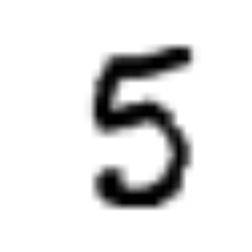

In [5]:
# display image
def display(img):
    
    # (784) => (28,28)
    one_image = img.reshape(28,28)
    
    plt.axis('off')
    plt.imshow(one_image, cmap=cm.binary)

# output image     
display(images_t[10])

In [6]:
X = images
y = data.iloc[:,0].values
print(y.shape[0])

42000


In [ ]:
from sklearn.neighbors import KNeighborsClassifier

KNC = KNeighborsClassifier(n_neighbors = 100, p=1, metric='minkowski')

KNC.fit(X,y)

train_predict = KNC.predict(X)

print(train_predict)

test_predict = KNC.predict(images_t)
print(test_predict[10])

print(KNC.score(X,y))

In [ ]:
output=[]
for i in range(1,test_predict.shape[0]+1):
    output.append([(i),(test_predict[i-1])])
    
# print(output)

# np.insert(output,[0,0],["ImageId", "Label"])
print(output)

# output.to_csv("trial1.csv")delimiter=
np.savetxt("trial1.csv",output,delimiter=',', fmt='%d', header='\b\bImageId,Label')